In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
 Ks = []
 losses = []
 f = open("K_sweep_5-50")
 for line in f.readlines():
     k,l = line.split(",")
     Ks.append(int(k))
     losses.append(float(l))
f.close()

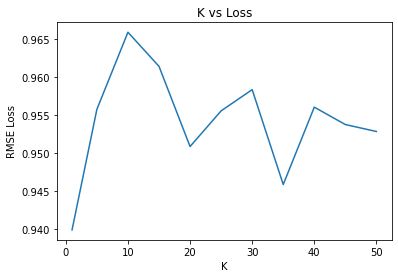

In [3]:
plt.plot(Ks, losses)
plt.ylabel("RMSE Loss")
plt.xlabel("K")
plt.title("K vs Loss")
plt.savefig("K_sweep_5-50_plot.jpg")

In [4]:
userIds = set()
movieIds = set()
triplets = []

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
         'drop_last': True}

file1 = open('../../ml-100k/u.data', 'r')
for line in file1.readlines():
    uid, mid, rating, timestamp = line.split('	')
    userIds.add(int(uid))
    movieIds.add(int(mid))
    triplets.append([uid,mid,rating])

rating_num = [0,0,0,0,0]
ratings = [1,2,3,4,5]

for u, m, r in triplets:
    rating_num[int(r)-1] += 1



In [5]:
triplets = np.array(triplets)

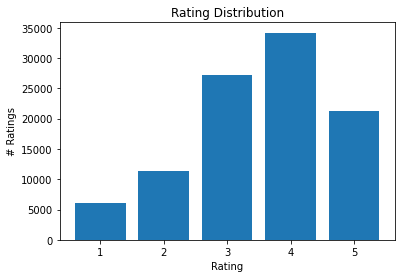

In [6]:
plt.bar(ratings,rating_num)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("# Ratings")
plt.savefig("ratings_distribution.jpg")

In [7]:
movieRatings = defaultdict(list)
userRatings = defaultdict(list)

for u,m,r in triplets:
    if m in movieRatings.keys():
        movieRatings[m].append(r)
    else:
        movieRatings[m] = [r]
    if u in userRatings.keys():
        userRatings[u].append(r)
    else:
        userRatings[u] = [r]

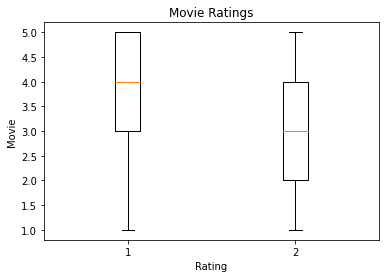

In [8]:
movie_0 = str(list(movieIds)[0])
movie_1 = str(list(movieIds)[2])


Rs_0 = movieRatings[movie_0]
Rs_0 = np.array(Rs_0,dtype='int')
Rs_1 = movieRatings[movie_1]
Rs_1 = np.array(Rs_1, dtype='int')
Rs = [Rs_0, Rs_1]
plt.boxplot(Rs)
plt.xlabel("Rating")
plt.ylabel("Movie")
plt.title("Movie Ratings")
plt.savefig("Movie_ratings_boxplot.jpg")

272
211


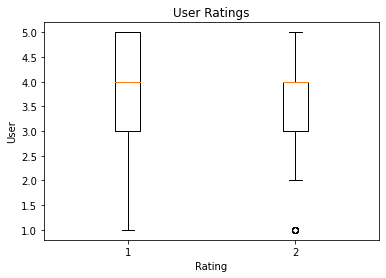

In [9]:
user_0 = str(list(userIds)[0])
user_1 = str(list(userIds)[1])

user_0 = None
user_1 = None

for i in range(0,max(userIds)):
    if len(userRatings[str(i)]) > 200:
        if user_0 == None:
            user_0 = str(i)
        elif user_1 == None:
            user_1 = str(i)
            break
print(len(userRatings[user_0]))
print(len(userRatings[user_1]))

Rs_0 = userRatings[user_0]
Rs_0 = np.array(Rs_0,dtype='int')
Rs_1 = userRatings[user_1]
Rs_1 = np.array(Rs_1, dtype='int')
Rs = [Rs_0, Rs_1]
plt.boxplot(Rs)
plt.xlabel("Rating")
plt.ylabel("User")
plt.title("User Ratings")
plt.savefig("User_ratings_boxplot.jpg")

In [25]:
num_ratings = []
averages = []
for movie in list(movieIds):
    num = len(movieRatings[str(movie)])
    if num > 0:
        num_ratings.append(num)
        ratings = np.array(movieRatings[str(movie)],dtype='int')
        average = np.sum(ratings)/len(ratings)
        averages.append(average)

In [ ]:
np.arg_max()

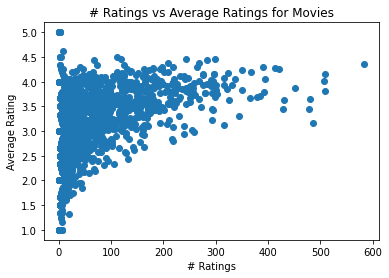

In [28]:
plt.scatter(num_ratings,averages)
plt.xlabel("# Ratings")
plt.ylabel("Average Rating")
plt.title("# Ratings vs Average Ratings for Movies")
plt.savefig("Average_movie_ratings.jpg")

In [35]:
ratings = []
num_ratings = []
for movie in list(movieIds):
    num = len(movieRatings[str(movie)])
    num_ratings.append(num)
    for i in range(0,num):
        ratings.append(movie)
np.argmax(num_ratings)


[452, 131, 90, 209, 86, 26, 392, 219, 299, 89, 236, 267, 184, 183, 293, 39, 92, 10, 69, 72, 84, 297, 182, 174, 293, 73, 57, 276, 114, 37, 154, 81, 97, 7, 11, 13, 8, 120, 87, 57, 37, 148, 40, 79, 80, 27, 133, 117, 81, 583, 81, 91, 128, 104, 149, 394, 40, 175, 83, 64, 59, 127, 82, 283, 115, 162, 103, 134, 321, 251, 220, 129, 128, 7, 5, 54, 151, 33, 336, 68, 110, 261, 176, 18, 58, 150, 138, 213, 275, 95, 143, 104, 112, 137, 219, 295, 256, 390, 172, 508, 73, 54, 15, 5, 74, 71, 42, 65, 130, 31, 272, 20, 9, 67, 15, 125, 378, 293, 4, 67, 429, 106, 115, 187, 244, 97, 413, 65, 129, 23, 95, 246, 171, 198, 259, 105, 171, 19, 50, 61, 72, 57, 222, 243, 65, 10, 185, 128, 23, 157, 326, 82, 247, 174, 98, 148, 127, 60, 101, 69, 220, 106, 92, 151, 64, 58, 67, 316, 118, 121, 65, 367, 324, 420, 208, 284, 137, 125, 221, 221, 507, 226, 291, 116, 239, 251, 209, 170, 66, 124, 276, 116, 157, 241, 301, 251, 239, 127, 165, 206, 89, 280, 182, 350, 136, 50, 66, 200, 191, 331, 206, 92, 134, 114, 212, 290, 120, 171,

(array([452., 131.,  90., ...,   1.,   1.,   1.]),
 array([1.00000000e+00, 1.99940547e+00, 2.99881094e+00, ...,
        1.68000119e+03, 1.68100059e+03, 1.68200000e+03]),
 <BarContainer object of 1682 artists>)

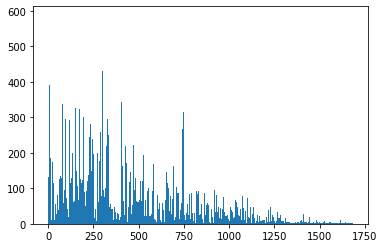

In [36]:
plt.hist(ratings, bins=len(movieIds))